In [1]:
### Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Читаем файл и сохраняем его в data
data = pd.read_csv('./Salary_Data.csv')

In [3]:
# Смотрим первые записи 
data.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Предобработка данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
data.columns # Всего 6 колонок

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

#### Посмотрим, какие есть уровни образования

In [6]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

#### Bachelor's и Bachelor's Degree, PhD и phD, Master's и Master's Degree  
#### - одинаковые уровни образования, поменяем их названия

In [7]:
replace_education_level = {
    "Bachelor's": "Bachelor",
    "Bachelor's Degree" : "Bachelor",
    "Master's" : "Master",
    "Master's Degree" : "Master",
    "phD": "PhD"}

In [8]:
data['Education Level']= data['Education Level'].replace(replace_education_level)

In [9]:
data['Education Level'].unique()

array(['Bachelor', 'Master', 'PhD', nan, 'High School'], dtype=object)

### Проверим, есть ли пропуски в данных

In [10]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

#### Удаляем записи со значениями NULL в Salary, Education Level, т.к. мы не можем использовать записи с неопределенной зарплатой и образованием для анализа

In [11]:
data.dropna(subset=['Salary'], inplace=True)

In [12]:
data.dropna(subset=['Education Level'], inplace=True)

In [13]:
data.isnull().sum() 

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

#### Посмотрим, какие есть гендеры

In [14]:
data['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

#### Удалим записи с гендером other

In [15]:
data.drop(data[data['Gender'] =='Other'].index, inplace=True)

In [16]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Проверяем и меняем типы данных

In [17]:
data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [18]:
# Поменяем тип данных Age с float64 на int

data['Age'] = data['Age'].replace([np.inf, -np.inf], np.nan)

# Преобразуем столбец Age в числовой формат
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Теперь преобразуем в int
data['Age'] = data['Age'].astype(int)

### Проверяем наличие дубликатов

In [19]:
data.duplicated().sum()

4905

#### В data нет столбца, который идентифицирует человека. Поэтому дубликаты мы не трогаем, т.к. это могут быть просто люди с одинаковым именем и образованием

# Исследовательский анализ

In [20]:
# Посмотрим основную статистику
data.describe().round()

,Age,Years of Experience,Salary
count,6684.0,6684.0,6684.0
mean,34.0,8.0,115307.0
std,8.0,6.0,52807.0
min,21.0,0.0,350.0
25%,28.0,3.0,70000.0
50%,32.0,7.0,115000.0
75%,38.0,12.0,160000.0
max,62.0,34.0,250000.0


### Средняя зарплата для мужчин и женщин

In [21]:
data_gr_gender = data.groupby('Gender')['Salary'].describe()

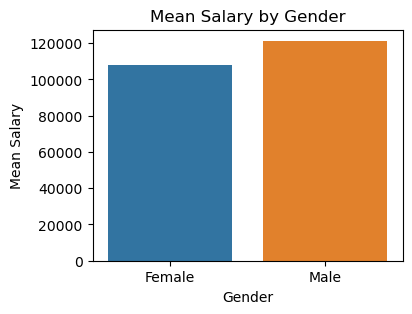

In [22]:
plt.figure(figsize=(4, 3))
sns.barplot(x=data_gr_gender.index, y=data_gr_gender['mean'])
plt.title('Mean Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Salary')
plt.show()

### В среднем у мужчин зарплата больше, чем у женщин

### Средняя  зарплата по уровням образования

In [23]:
data_gr_salary = data.groupby('Education Level')['Salary'].describe()
data_gr_salary_sorted = data_gr_salary.sort_values(by='mean')

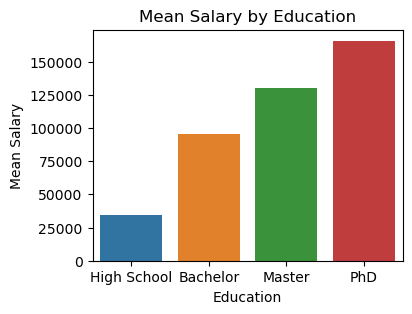

In [24]:
plt.figure(figsize=(4, 3))
sns.barplot(x=data_gr_salary_sorted.index, y=data_gr_salary_sorted['mean'])
plt.title('Mean Salary by Education')
plt.xlabel('Education')
plt.ylabel('Mean Salary')
plt.show()

### Чем выше образование, тем больше зарплата

### Построим боксплот и посмотрим, сколько в среднем зарабатывают люди с разным уровнем образования, и есть ли среди них исключения

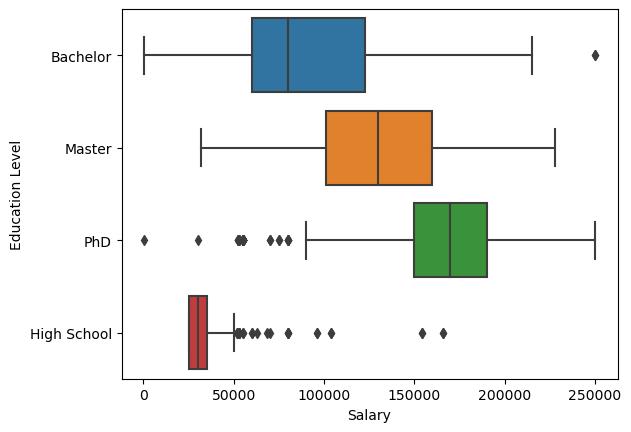

In [25]:
sns.boxplot(data=data, x='Salary', y='Education Level')
plt.show()

### Опять видим, что зарплата зависит от образования,
### но есть люди, которые, не  имея ученой степени зарабатывают столько же, сколько люди с PhD, 
### и люди с PhD, которые зарабатывают, как люди без высшего образования. Больше всего исключений среди выпускников школы

### Зависит ли зарплата от пола при одинаковом уровне обазования

In [26]:
data_gr_salary_gen = data.groupby(['Education Level', 'Gender'])['Salary'].mean()

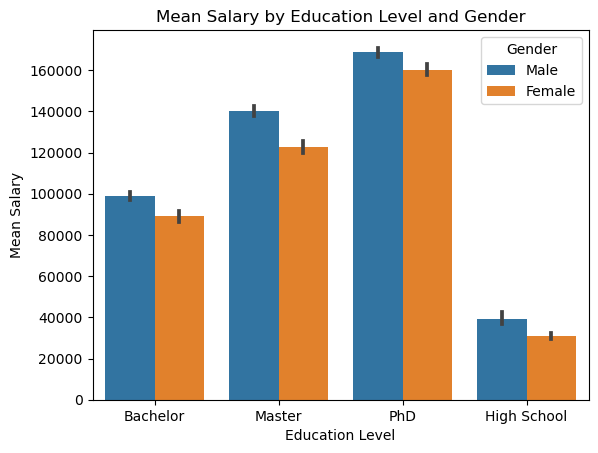

In [27]:
sns.barplot(x='Education Level', y='Salary', hue='Gender', data=data)
plt.title('Mean Salary by Education Level and Gender')
plt.xlabel('Education Level')
plt.ylabel('Mean Salary')
plt.show()

### У женщин с таким же уровнем образования, как у мужчин, зарплаты ниже

### Зависит ли зарплата от опыта работы

In [28]:
data_gr_exper = data.groupby(['Years of Experience'])['Salary'].describe()

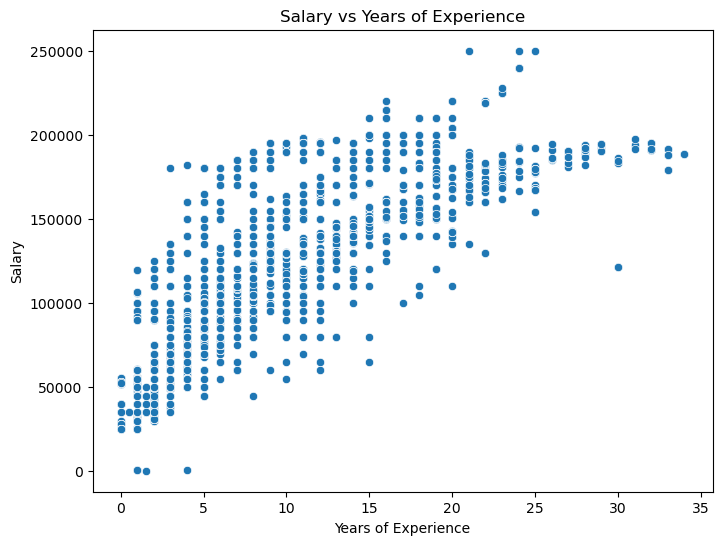

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=data)
plt.title('Salary vs Years of Experience')
plt.show()

### Чем больше опыт работы, тем больше зарплата

### Средний опыт работы для мужчин и женщин

In [30]:
data.groupby('Gender')['Years of Experience'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,3013.0,7.0,6.0,0.0,3.0,6.0,11.0,34.0
Male,3671.0,9.0,6.0,0.0,3.0,8.0,13.0,32.0


### Опыт работы у женщин в среднем на 2 года меньше, чем у жужчин

# Выводы:
## 1) Чем выше уровень образования, тем больше зарплата ? - В большинстве случаев это верно, но есть люди без высшего образования, которые зарабатывают больше людей с PhD.
## 2) Зарплата зависит от пола? - В среднем женщины зарабатывают меньше мужчин (при одинаковом образовании).
## 3) Зарплата зависит от опыта работы? - Да, определенно зависит.


### Обратим внимание на то, что женщин 3013, а мужчин 3671. Неравное количесвто записей для двух категорий могут влиять на анализ